In [1]:
# Loading common data related modules
import numpy as np
import pandas as pd
import math 
 
# Loading modelling algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor
 
# Loading tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score
 
# Loading visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
diamonds = pd.read_csv(r'C:\Users\tomas\Documents\Repozytoria\uczenie_maszynowe_w_pythonie\00_data_sources\diamonds.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.shape

(53940, 10)

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

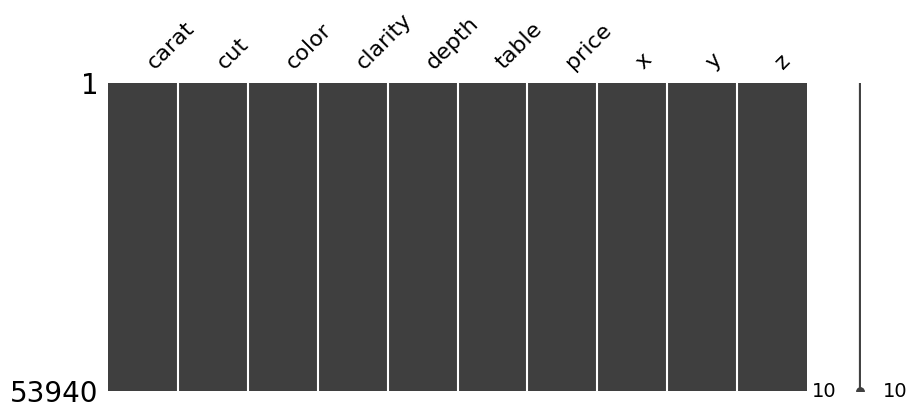

In [10]:
msno.matrix(diamonds, figsize=(10, 4))

In [12]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [13]:
len(diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

20

In [14]:
diamonds = diamonds[(diamonds[['x', 'y', 'z']] != 0).all(axis=1)]

In [15]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [17]:
corr = diamonds.corr(numeric_only=True)

In [18]:
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


<Axes: >

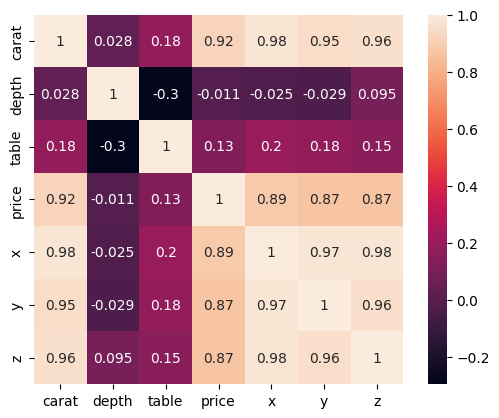

In [19]:
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

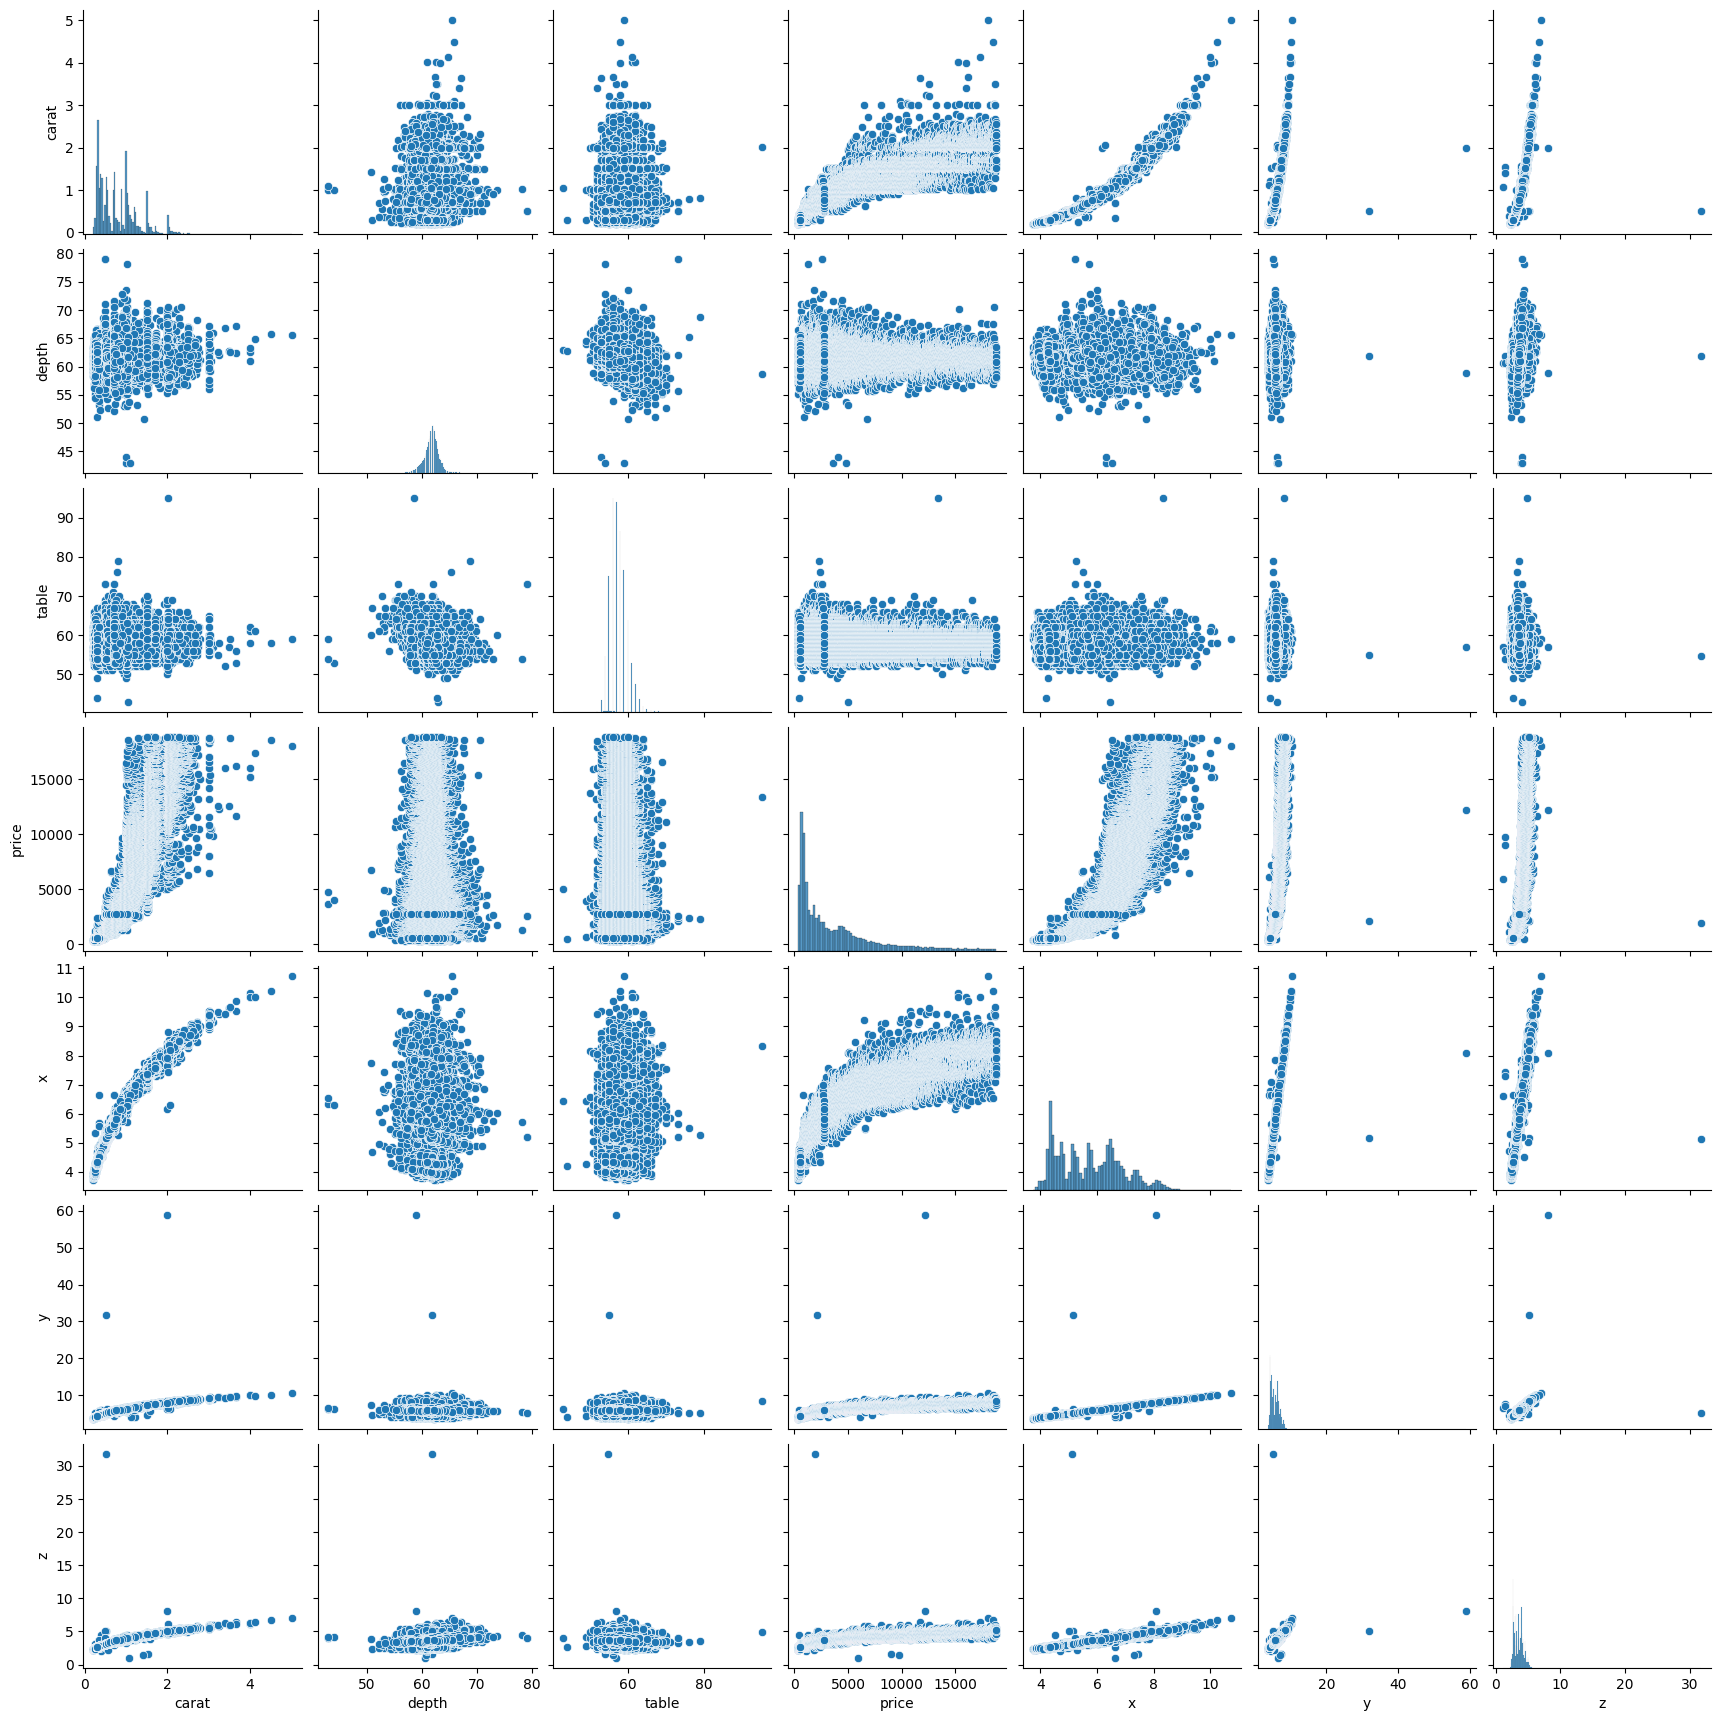

In [20]:
sns.pairplot(diamonds)

<Axes: xlabel='carat', ylabel='Density'>

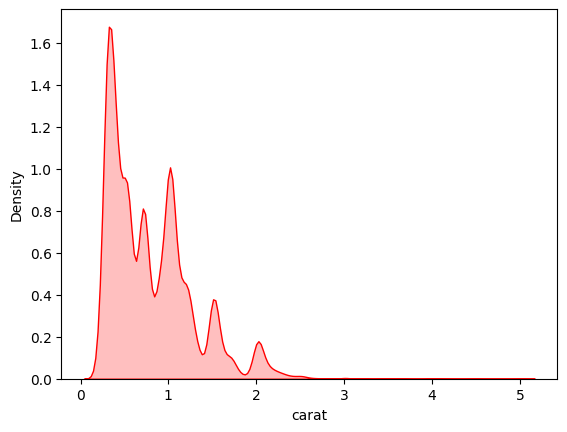

In [21]:
sns.kdeplot(diamonds['carat'], fill=True, color='r')

(array([1.3092e+04, 1.0846e+04, 6.8450e+03, 3.9820e+03, 9.0050e+03,
        3.5410e+03, 2.7560e+03, 1.4020e+03, 2.8100e+02, 1.4940e+03,
        4.1000e+02, 1.4100e+02, 7.4000e+01, 1.1000e+01, 2.6000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.2   , 0.3924, 0.5848, 0.7772, 0.9696, 1.162 , 1.3544, 1.5468,
        1.7392, 1.9316, 2.124 , 2.3164, 2.5088, 2.7012, 2.8936, 3.086 ,
        3.2784, 3.4708, 3.6632, 3.8556, 4.048 , 4.2404, 4.4328, 4.6252,
        4.8176, 5.01  ]),
 <BarContainer object of 25 artists>)

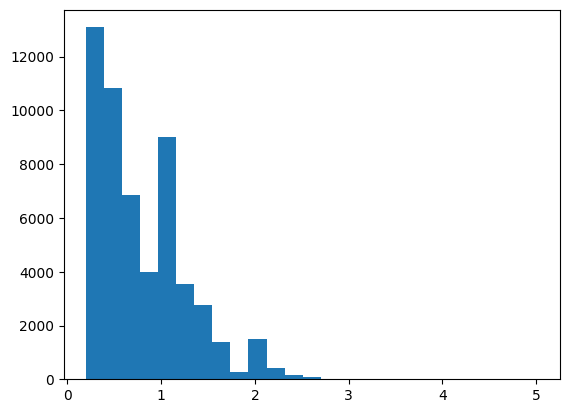

In [22]:
plt.hist(diamonds['carat'], bins=25)

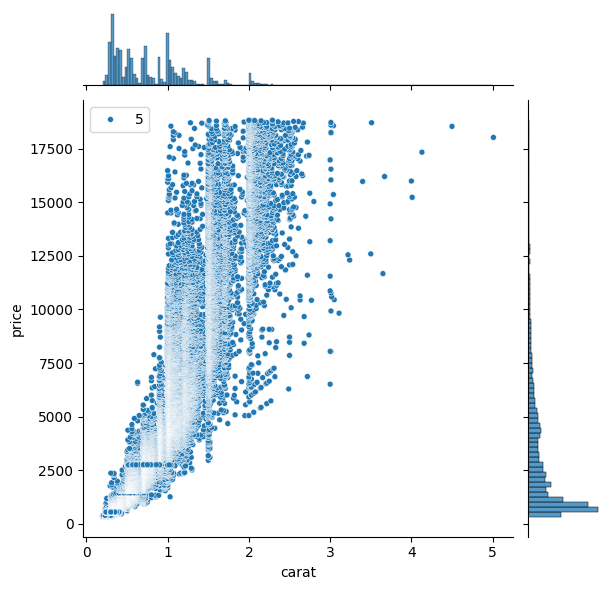

In [23]:
sns.jointplot(x='carat', y='price', data=diamonds, size=5)

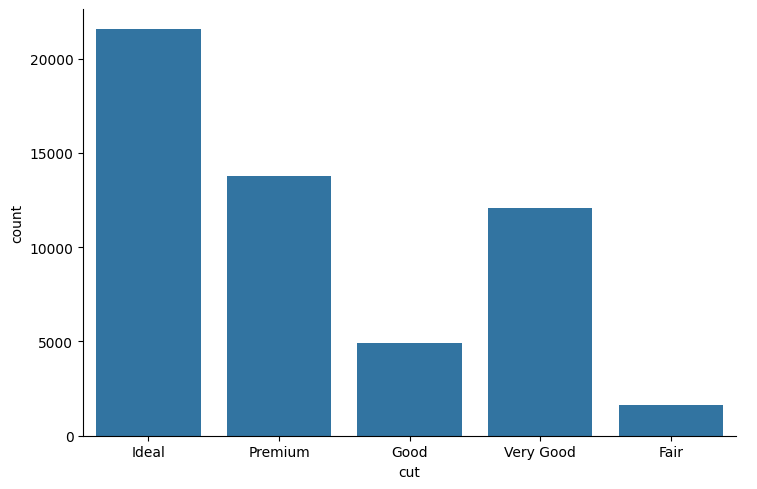

In [24]:
sns.catplot(x='cut', data=diamonds, kind='count', aspect=1.5)

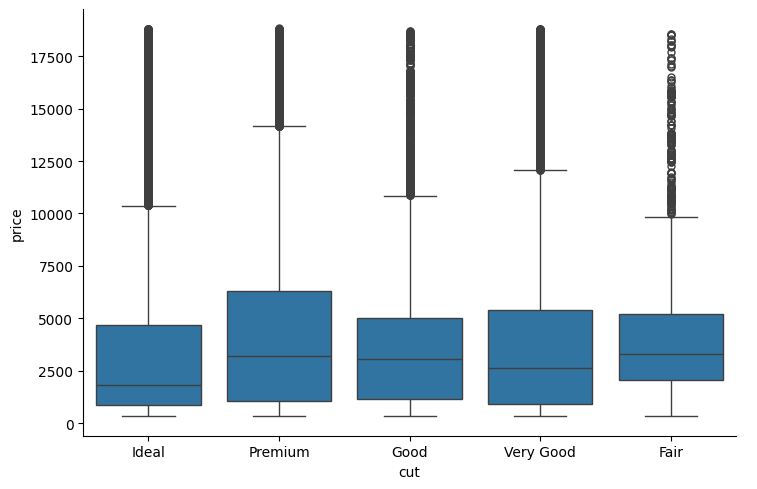

In [25]:
sns.catplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=1.5)

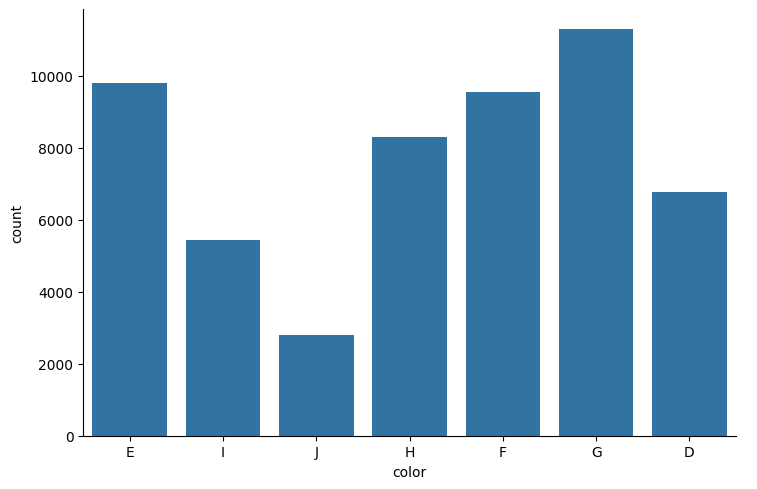

In [26]:
sns.catplot(x='color', data=diamonds , kind='count',aspect=1.5)

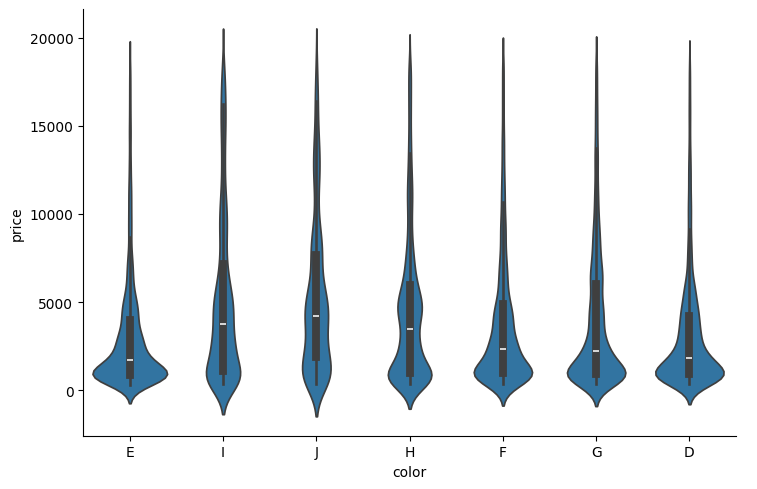

In [27]:
sns.catplot(x='color', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)

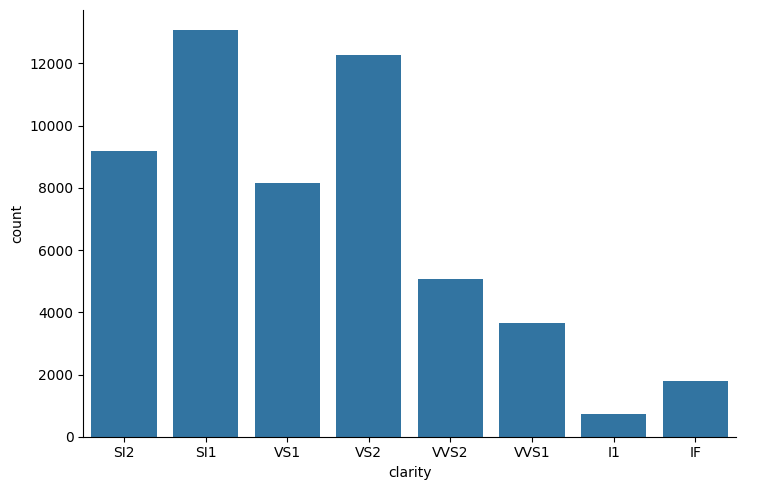

In [28]:
sns.catplot(x='clarity', data=diamonds , kind='count',aspect=1.5)

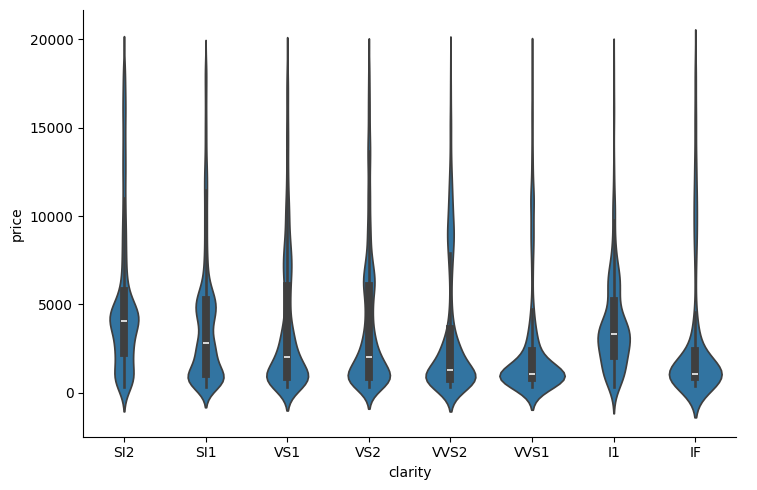

In [29]:
sns.catplot(x='clarity', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)

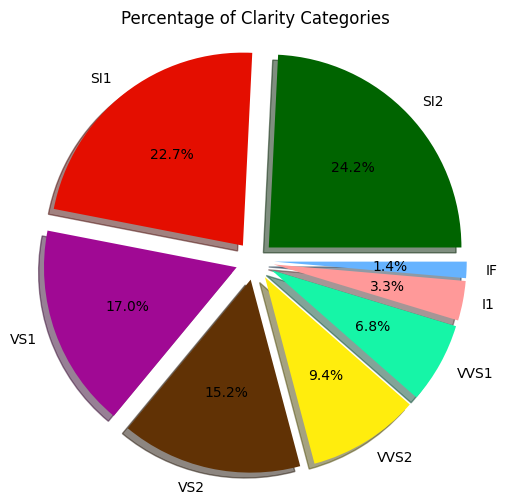

In [30]:
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', 
          '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

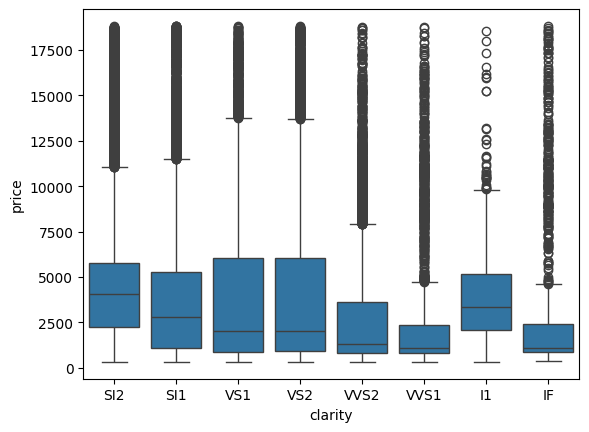

In [31]:
sns.boxplot(x='clarity', y='price', data=diamonds)

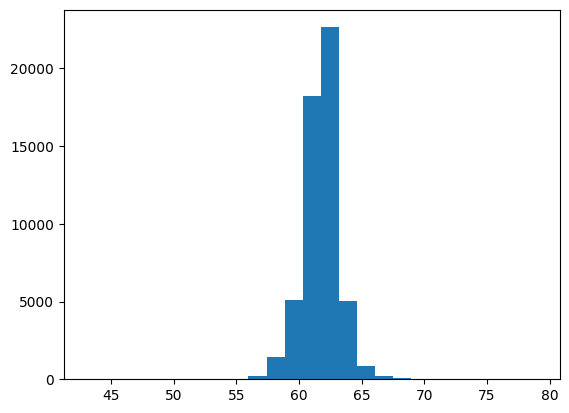

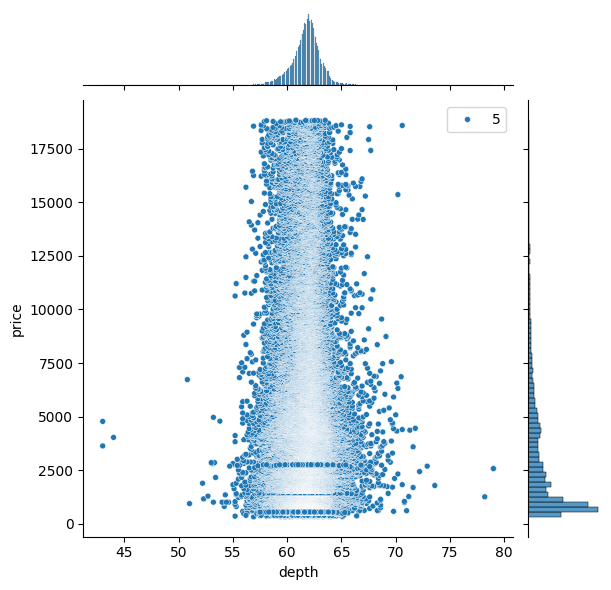

In [32]:
plt.hist('depth' , data=diamonds , bins=25)
sns.jointplot(x='depth', y='price', data=diamonds, size=5)

<Axes: xlabel='table', ylabel='Density'>

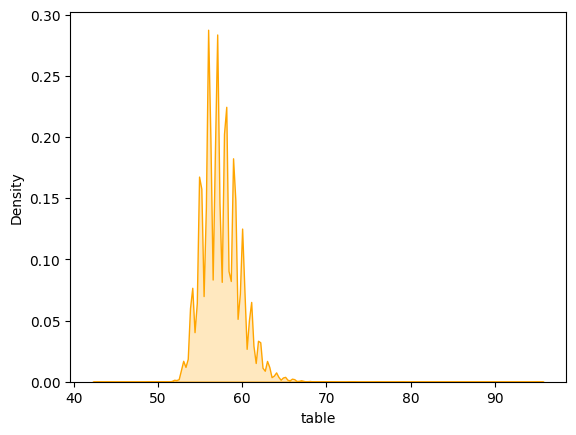

In [33]:
sns.kdeplot(diamonds['table'], fill=True , color='orange')

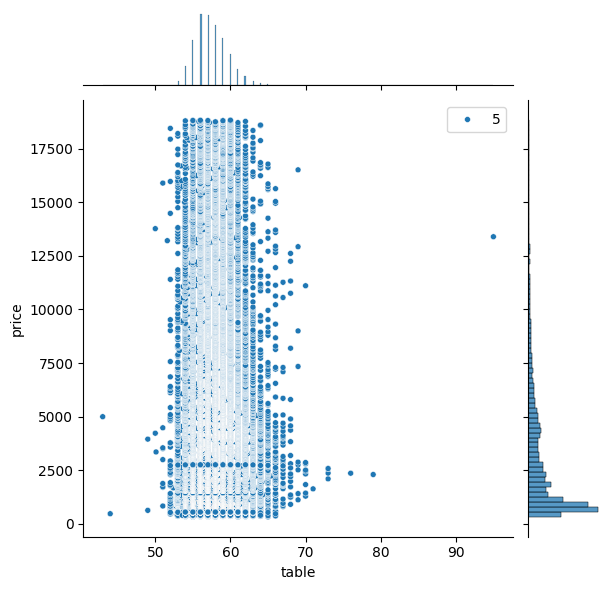

In [34]:
sns.jointplot(x='table', y='price', data=diamonds , size=5)

(2.0, 10.0)

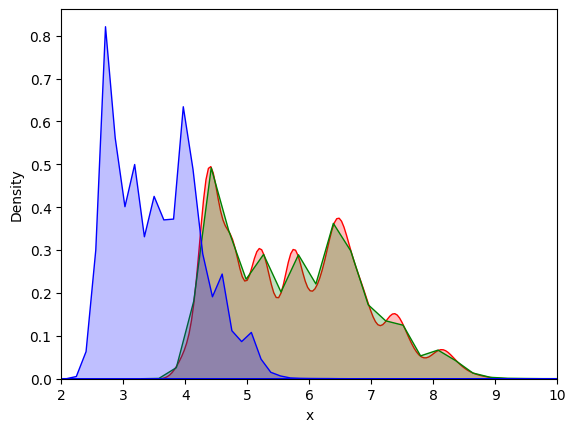

In [35]:
sns.kdeplot(diamonds['x'] , fill=True , color='r' )
sns.kdeplot(diamonds['y'] , fill=True , color='g' )
sns.kdeplot(diamonds['z'] , fill= True , color='b')
plt.xlim(2,10)

In [36]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

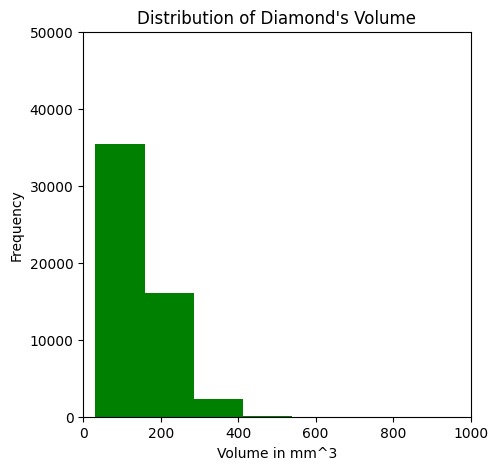

In [37]:
plt.figure(figsize=(5,5))
plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

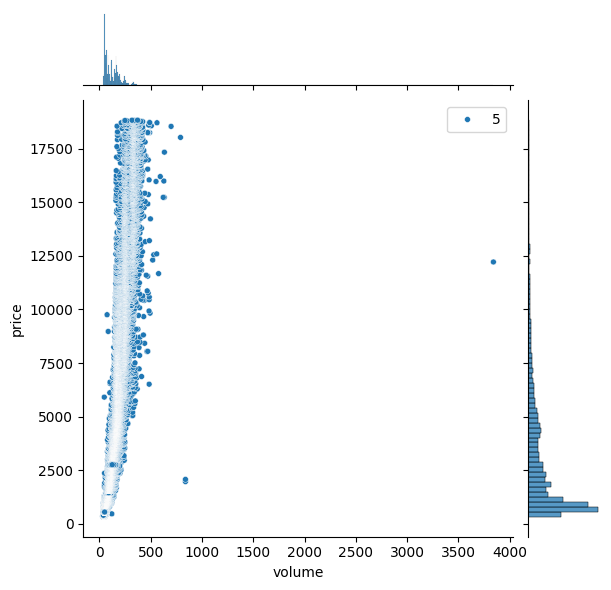

In [38]:
sns.jointplot(x='volume', y='price' , data=diamonds, size=5)

In [39]:
diamonds.drop(['x','y','z'], axis=1, inplace= True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [40]:
diamonds = pd.get_dummies(diamonds, prefix_sep='_', drop_first=True)
diamonds.head()

,carat,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,34.505856,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,38.076885,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,46.724580,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,51.917250,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [41]:
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=66)

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.44478313,  0.17288101, -0.20322089, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [-0.54732375,  1.08170564,  1.13910995, ..., -0.54065658,
        -0.269607  ,  3.09437247],
       [-1.03282286, -0.52621485, -0.65066451, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       ...,
       [ 0.5081091 ,  0.59233853,  0.24422272, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [ 0.46589178,  0.45251936, -1.09810812, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [ 2.78784405,  0.2427906 , -0.65066451, ..., -0.54065658,
        -0.269607  , -0.3231673 ]])

In [44]:
scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
          'Ridge Regression', 'RandomForest Regression', 
          'KNeighbours Regression']

In [45]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [46]:
scores.append(r2)
print('Linear Regression R2: {0:.2f}'.format(r2))

Linear Regression R2: 0.92


In [47]:
# Lasso
lasso = Lasso()
lasso.fit(X_train , y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Lasso Regression R2: {0:.2f}'.format(r2))

Lasso Regression R2: 0.92


In [48]:
# Adaboost classifier
adaboost = AdaBoostRegressor(n_estimators=1000)
adaboost.fit(X_train , y_train)
y_pred = adaboost.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('AdaBoost Regression R2: {0:.2f}'.format(r2))

AdaBoost Regression R2: 0.80


In [49]:
# Ridge
ridge = Ridge()
ridge.fit(X_train , y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Ridge Regression R2: {0:.2f}'.format(r2))

Ridge Regression R2: 0.92


In [50]:
# Random forest
randomforest = RandomForestRegressor()
randomforest .fit(X_train , y_train)
y_pred = randomforest .predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Random Forest R2: {0:.2f}'.format(r2))

Random Forest R2: 0.98


In [51]:
# K-Neighbours
kneighbours = KNeighborsRegressor()
kneighbours.fit(X_train , y_train)
y_pred = kneighbours.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('K-Neighbours Regression R2: {0:.2f}'.format(r2))

K-Neighbours Regression R2: 0.95


In [52]:
ranking = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : scores})
ranking = ranking.sort_values(by='R2-Scores' ,ascending=False)
ranking

,Algorithms,R2-Scores
4,RandomForest Regression,0.977475
5,KNeighbours Regression,0.951635
0,Linear Regression,0.917445
3,Ridge Regression,0.917444
1,Lasso Regression,0.917400
2,AdaBoost Regression,0.799935


<Axes: xlabel='R2-Scores', ylabel='Algorithms'>

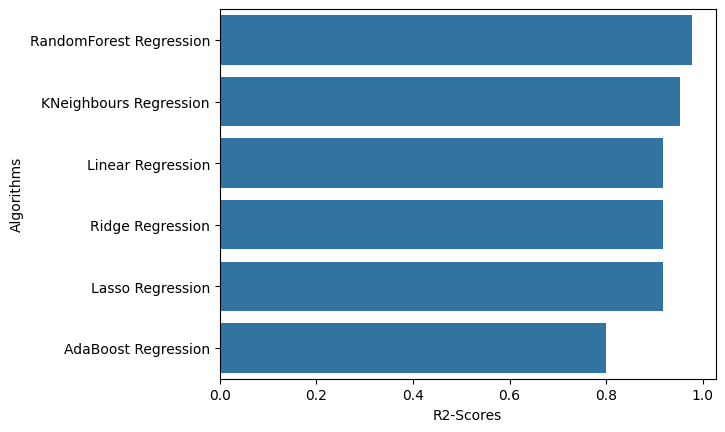

In [53]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=ranking)